In [1]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pylab as plt
from matplotlib import animation, patches, rc
import ipywidgets as widgets
import matplotlib as mpl
rc('animation', html='html5')
rc('savefig', dpi=80)
rc('figure', dpi=80)
from IPython.display import YouTubeVideo, HTML

# Introducción al procesamiento digital de señales

## ¿Qué es un sistema?

Es un proceso que produce una señal de salida en función de una señal de entrada

<img src="../images/signal-intro.png" width="600" align="center" />

## ¿Qué es una señal?

Una señal es una función que describe o representa el comportamiento de un fenómeno físico o sistema

Este comportamiento puede variar ya sea en el tiempo, espacio u otra variable

Revisemos los siguientes ejemplos ¿Cuáles son las variables independientes y dependientes en cada caso?

### Las variaciones del [IPSA](https://es.wikipedia.org/wiki/%C3%8Dndice_de_Precio_Selectivo_de_Acciones) entre 2006 y 2015

<img src="../images/signal-ipsa.png" width="800" align="center"/>

### Los pulsos de reloj de un microcontrolador

<img src="../images/signal-clock.png" width="400" align="center"/>

### El brillo relativo de una estrella medido desde la Tierra. La estrella es orbitada por un [exoplaneta](https://en.wikipedia.org/wiki/Exoplanet)

<img class="displayed" src="../images/signal-transit.gif" width="600" align="center"/>

### Una conversación humana grabada digitalmente

<img src="../images/signal-audio.gif">

### Actividad cerebral medida usando [ElectroEncefalografía](https://es.wikipedia.org/wiki/Electroencefalograf%C3%ADa)

<img  src="../images/signal-eeg.png" width="600" align="center"/>

### Información meteorológica de un huracán

<img src="../images/signal-weather.gif" width="500" align="center"/>

### Una película

<img src="../images/signal-bunny.gif" width="700" align="center"/>

## ¿Qué es el procesamiento de señales? 

Disciplina que se decida al **diseño de sistemas** para

- representar ...
- filtrar ...
- codificar ...
- transmitir ...
- estimar ...
- detectar ...
- inferir ...
- descubrir ...
- reconocer ...
- síntesizar ...
- reproducir ...
- etc

... señales


Fuente: [Jose S.F. Moura, "What is signal processing", *IEEE signal processing magazine*](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5230869")

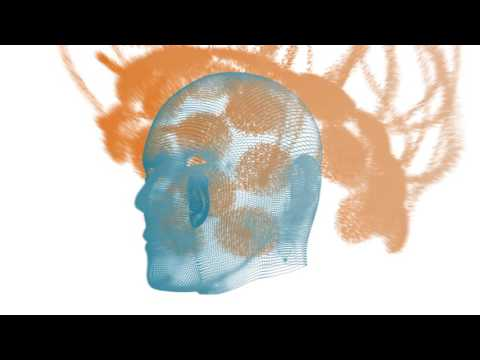

In [2]:
YouTubeVideo('R90ciUoxcJU')

## Definición matemática de una señal

Una señal se representa matematicamente como una **función** 

$$
y = f(x)
$$

es decir un mapeo entre el espacio de entrada y el espacio de salida

$$
f: \mathcal{X} \rightarrow \mathcal{Y}, \quad x \in \mathcal{X} \wedge y \in \mathcal{Y},
$$

donde:

- $x$ se llama **variable independiente**, **entrada** o **argumento** y su espacio se llama **dominio**
- $y$ se llama **variable dependiente**, **salida** o **retorno** y su espacio se llama **codominio**

### Funciones matemáticas típicas

Impulso unitario:
$$
\delta[n] = \begin{cases} 1 & n=0\\ 0 & n \neq 0 \end{cases}
$$
Escalo unitario:
$$
u[n] = \sum_{k=0}^\infty \delta[n-k] = \begin{cases} 1 & n\geq 0\\ 0 & n < 0 \end{cases} 
$$
Propiedad: $\delta[n] = u[n] - u[n-1]$

Función exponencial real:
$$
y[n] = C e^{\alpha n}
$$

Función exponencial compleja:
$$
y[n] = e^{jn\omega} = \Re [e^{jn\omega}] + j \Im[e^{jn\omega}]  = \cos(n\omega) + j \sin (n\omega)
$$

Función exponencial compleja general:
$$
y[n] = |C|e^{\alpha n + j\omega n + j\phi} = |C|e^{\alpha n} [\cos(\omega n + \phi) + j\sin(\omega n + \phi)]
$$
Función Gaussiana
$$
y[n] = e^{- \alpha (n-n_0)^2}, \alpha> 0
$$

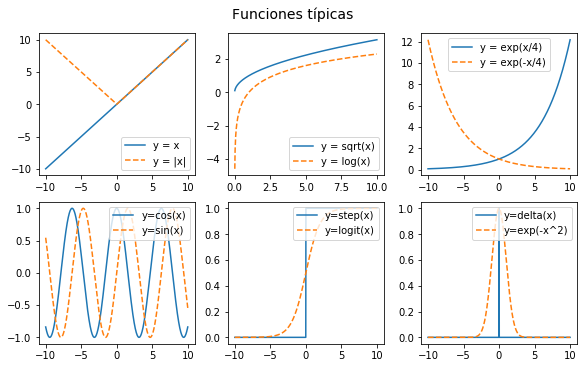

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(8, 5), constrained_layout=True)
fig.suptitle('Funciones típicas', fontsize=14)
x = np.linspace(-10, 10, num=1000)
ax[0, 0].plot(x, x, label='y = x');  
ax[0, 0].plot(x, np.absolute(x), label='y = |x|', linestyle='--');  ax[0, 0].legend()
ax[0, 1].plot(x[x>0], np.sqrt(x[x>0]), label='y = sqrt(x)'); 
ax[0, 1].plot(x[x>0], np.log(x[x>0]), label='y = log(x)', linestyle='--');  ax[0, 1].legend();
ax[0, 2].plot(x, np.exp(0.25*x), label='y = exp(x/4)');
ax[0, 2].plot(x, np.exp(-0.25*x), label='y = exp(-x/4)', linestyle='--');  ax[0, 2].legend(); 
ax[1, 0].plot(x, np.cos(x), label='y=cos(x)')
ax[1, 0].plot(x, np.sin(x), label='y=sin(x)', linestyle='--'); ax[1, 0].legend(loc=1)
ax[1, 1].plot(x, np.heaviside(x, 0), label='y=step(x)'); 
ax[1, 1].plot(x, 1.0/(1.0+np.exp(-x)), label='y=logit(x)', linestyle='--'); ax[1, 1].legend(loc=1)
ax[1, 2].plot(x, scipy.signal.unit_impulse(len(x), 'mid'), label='y=delta(x)');
ax[1, 2].plot(x, np.exp(-0.5*x**2), label='y=exp(-x^2)', linestyle='--'); ax[1, 2].legend(loc=1);

### Algunas propiedades de las funciones

- Función par o simétrica: 
$$
f(x) = f(-x)
$$
- Función inpar o antisimétrica: 
$$
f(x) = -f(-x)
$$
- Función periódica: 
$$
\exists ~ T ~\text{tal que}~ f(x) = f(x+T)
$$
- Función lineal (adición vectorial y multiplicación escalar): 
$$
f(ax + by) = a f(x) + b f(y),
$$
con $a$, $b$ coeficientes escalares 


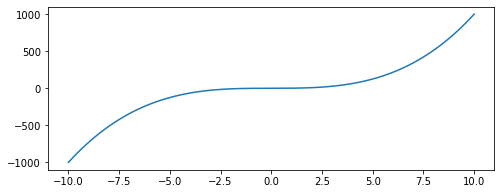

In [4]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(-10, 10, num=1000)
ax.plot(x, -(-x)**3, label='y = x');  

In [5]:
%%capture
fig, ax = plt.subplots(figsize=(8, 3))
t = np.linspace(-6, 6, num=1000)
x = np.sin(2*np.pi*1*t)
line = ax.plot(t, x)

def update(k = 1): 
    line[0].set_ydata(np.sin(2*np.pi*0.01*k*t));
    ax.set_title("Frequency: %0.2f [Hz]" %(0.01*k))
    return (line[0], )

anim=animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)

In [6]:
HTML(anim.to_html5_video())

In [7]:
%%capture
fig, ax = plt.subplots(3, 1, figsize=(8, 5), constrained_layout=True)
x = np.linspace(-2, 2, num=500)
line0, = ax[0].plot(x, np.cos(2.0*np.pi*x)); 
ax[0].set_title('Sinusoidal')
line1, = ax[1].plot(x, scipy.signal.sawtooth(2.0*np.pi*x));  
ax[1].set_title('Diente de sierra')
line2, = ax[2].plot(x, scipy.signal.square(x));  
ax[2].set_title('Cuadrada');

def update(k = 1): 
    arg = 2.0*np.pi*(x - k*0.01)
    line0.set_ydata(np.cos(arg))
    line1.set_ydata(scipy.signal.sawtooth(arg))
    line2.set_ydata(scipy.signal.square(arg))
    return (line0, line1, line2,)
anim = animation.FuncAnimation(fig, update, frames=100, interval=20, blit=True);

HTML(anim.to_html5_video())

## Clasificación de señales según tipo de variable

A grandes rasgos podemos clasificar las señales como:

- Variable independiente continua (columna izquierda)
- Variable independiente discreta (columna derecha)
- Variable dependiente continua/análoga (fila superior)
- Variable dependiente cuantizada/digital (fila inferior)

<img src="../images/signal-classification1.png" width="600" align="center">

- Los computadores trabajan con **señales digitales de tiempo discreto**
- Los señales "naturales" son en general analógicas de tiempo continuo


Entonces, para trabajar con señales analógicas en nuestro computador:

1. Se discretiza en el tiempo **muestreando** según el reloj del sistema, por ejemplo:
$$
x_A(t=kT_S) = x[k], \quad k \in \mathbb{Z}
$$
1. Se cuantiza la amplitud, por ejemplo:
$$
v_D = \begin{cases} 0 & v_A \in [0.0, 0.8] V \\ 1 & v_A \in [2.0, 5.0] V\end{cases}
$$  

<StemContainer object of 3 artists>

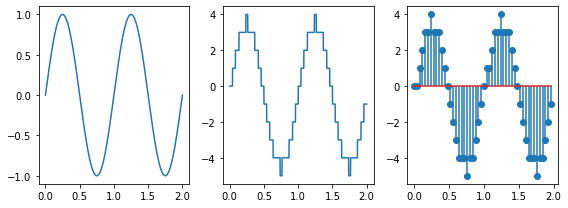

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True)
x = np.linspace(0.0, 2.0, num=1000)
y = np.sin(2.0*np.pi*1.0*x)
ax[0].plot(x, y)
ax[1].plot(x, np.floor(y//0.249))
ax[2].stem(x[::20], np.floor(y[::20]//0.249), use_line_collection=True);


<div class="alert alert-info">
    
Una señal discreta es una secuencia de valores indexada por un entero, es decir un <b>arreglo</b>

</div>
  

## Propiedades de las señales

En general trabajaremos con señales que, dentro de un rango de interés, son **acotadas** en energía, potencia y/o en ancho de banda. Es decir son señales finitas (no divergen ni se vuelven singulares)

<div class="alert alert-info">
    La energía de una señal mide su "tamaño" o el "espacio que ocupa". Para una señal analógica y discreta, respectivamente
</div>

Matemáticamente, se define como

$$
E_s = \int_{-\infty}^\infty |s(t)|^2 \,dt  \qquad E_s = \sum_{n=-\infty}^\infty |s[n]|^2 
$$

Una señal acotada en energía debe cumplir $E_s < \infty$

<div class="alert alert-info">

La potencia promedio de una señal se define como su energía por unidad de tiempo

</div>

Matemáticamente, se define como

$$
P_s = \lim_{T\to \infty} \frac{1}{2T} \int_{- T}^{T} |s(t)|^2 \,dt  \qquad P_s = \lim_{N\to \infty} \frac{1}{2N+1} \sum_{n = - N}^{N} |s[n]|^2 
$$

Una señal acotada en potencia debe cumplir $P_s < \infty$

Una señal de energía finita tiene potencia cero

Una señal de potencia finita tiene duración infinita

<div class="alert alert-info">
    
El ancho de banda de una señal mide su tasa de cambio o velocidad<br>
    
</div> 

Una señal acotada en ancho de banda debe tener transiciones suaves

¿Cual es la energía de esta señal?
$$
s(t) = \begin{cases} 0 & t < 0 \\ 2e^{-t/2} & t \geq 0\end{cases}
$$

4.0020003250765726


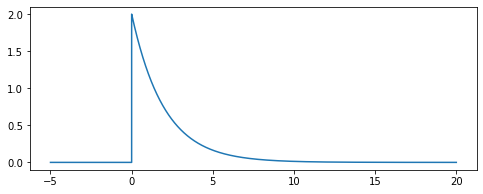

In [9]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 3))
dt=0.001; x = np.arange(-5, 20, step=dt)
y = np.zeros(shape=(x.shape))
y[x>=0] = 2*np.exp(-x[x>=0]/2)
ax.plot(x, y)

print((y**2).sum()*dt);

## Clasificación de señales según su naturaleza

- **Señal determinista:** Puede describirse completamente por una ecuación matemática

Por ejemplo

$$
y = \cos(x)\sin(2x) + 0.1x
$$

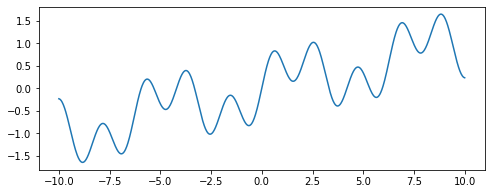

In [10]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(-10, 10, num=1000)
ax.plot(x, np.cos(x)*np.sin(2*x) + 0.1*x);  

- **Señal estocástica:** Se describe probabilisticamente, es decir en términos de su densidad de probabilidad.
   
Por ejemplo

$$ 
z \sim \mathcal{N}(\mu, \Sigma) 
$$


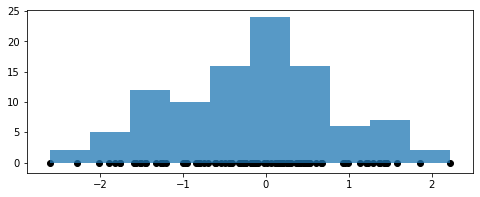

In [11]:
fig, ax = plt.subplots(figsize=(8, 3))
z = np.random.multivariate_normal(np.zeros(100), np.eye(100))
ax.hist(z, alpha=0.75)
ax.scatter(z, [0]*len(z), c='k');  

### Variable aleatoria

Es una variable cuyos valores posibles son resultados de un fenomeno aleatorio 

- Se describe en términos de su función de densidad de probabilidad (fdp) o distribución 
- Los valores observados a partir de la V.A. se llaman **realizaciones**
- Por lo general asumimos que las realizaciones son **iid**: independientes e identicamente distribuidas
- Usualmente se denota como $X$ y sus realizaciones como $\{x_1, x_2, \ldots, x_N\}$



### Distribuciones de probabilidad y momentos estadísticos 

Una distribución se describe a través de sus momentos estadísticos. 


Para una variable aleatoria X su momento de orden k es
$$
\mu_k = \mathbb{E} \left[X^k\right]
$$
y su momento central de orden k
$$
\hat \mu_k =\mathbb{E} \left[(X - \mathbb{E}[X])^k\right]
$$
donde la esperanza se define como
$$
\mathbb{E}[X] = \sum_n x_n p(x_n)
$$
y la media muestreal es
$$
\langle X \rangle = \frac{1}{N} \sum_{n=1}^N x_n
$$

Los momentos estadísticos más usados son la 
- Media ($\mu$): $\mu_1$ 
- Varianza ($\sigma^2$): $\hat \mu_2$ 
- Simetría: $\frac{\hat \mu_3 }{\sqrt{\hat \mu_2^3}}$
- Kurtosis: $\frac{\hat \mu_4 }{ \hat \mu_2^2}$


<img src="../images/moments.png">





### Proceso aleatorio y proceso estacionario

- Un proceso aleatorio es una colección de variables aleatorias indexadas 
$$
X^t = {X_1, X_2, X_3, \ldots, X_T}
$$
- Una realización del P.A. es una serie de tiempo 
$$
X^t \sim \{x_t\}_{t=1,\ldots,T} = {x_1, x_2, x_3, \ldots, x_T}
$$
- Un **proceso estacionario** es aquel donde sus momentos no varían con el tiempo, es decir
$$
\mathbb{E}[X_1] = \mathbb{E}[X_2] = \ldots = \mathbb{E}[X_T] 
$$
- Un **proceso ergódico** es aquel donde los momentos se pueden deducir a partir de una realización (suficientemente larga) del P.A. 
    - Esto es útil pues muchas veces observamos sólo una realización
    - Los promedios muestreales del ensamble equivalen a promedios muestreales temporales

$$
\langle x_t \rangle = \mathbb{E}[X_k] ~~\forall k
$$

<img src="../images/stationary-and-ergodic.png" width="800">

In [12]:
%%capture
fig, ax = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)
x = np.linspace(-3, 3, num=100); 
np.random.seed(0)
data = np.random.randn(1000)
def update(N = 1):    
    ax[0].cla(); ax[1].cla(); ax[0].set_ylim(-3, 3);
    ax[1].set_ylim(-3, 3); ax[1].set_xlim(0, 0.5);
    ax[0].plot(data[:N]); 
    ax[1].hist(data[:N], bins=10, density=True, orientation=u'horizontal'); 
    ax[1].plot(np.exp(-x**2)/np.sqrt(2.0*np.pi), x); 
    return ()

anim = animation.FuncAnimation(fig, update, frames=1000, interval=100, blit=True)

In [13]:
HTML(anim.to_html5_video())

/home/phuijse/.conda/envs/pyro-env/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [14]:
def update(seed, tau):
    fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
    np.random.seed(seed); ax.cla(); ax.set_ylim(-5, 25)
    for k in range(0, 25, 5): 
        ax.plot(100*[k], 'k--', alpha=0.5)
        dt = np.repeat(np.reshape(np.arange(100), (1, -1)), 100, axis=0)
        S = np.exp(-0.5*np.square(dt - dt.T)/tau**2)
        data = k + np.random.multivariate_normal(np.zeros(100), S)
        ax.plot(data); 
        
widgets.interact(update, 
                 tau=widgets.FloatSlider(description="Correlación", continuous_update=False, min=0.1, max=10),
                 seed=widgets.IntSlider(description='Semilla', continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='Semilla'), FloatSlider(value=0.…

<function __main__.update(seed, tau)>

## Ruido

En la práctica no solemos observar señales puramente deterministas. Esto se debe a la presencia del **ruido**

El ruido es una corrupción indeseable y usualmente estocástica que modifica la señal de interés


### Corrupción aditiva

Un supuesto muy usado es considerar que el ruido es una **corrupción aditiva**

$$
y[k] = x[k] + n[k],
$$

donde $y$ es la señal observada, $x$ es la señal de interés y $n$ es una señal de ruido

In [15]:
t = np.linspace(-10, 10, num=500)
x = np.cos(t)*np.sin(2*t) + 0.1*t
np.random.seed(0)
n = np.random.randn(len(t))

def update(s = 1.0):
    fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True)
    ax[0].cla(); ax[0].plot(t, x)
    ax[1].cla(); ax[1].plot(t, n*s); ax[1].set_ylim(-5, 5)
    ax[2].cla(); ax[2].plot(t, x+n*s) 
    ax[2].set_title("SNR: %0.2f [dB]" %(10*np.log10(np.sum(x**2)/np.sum((n*s)**2))))
    fig.show()

widgets.interact(update, s=widgets.FloatSlider(description=r"$\sigma$", 
                                               continuous_update=False, min=0.01, max=3.0));

interactive(children=(FloatSlider(value=0.01, continuous_update=False, description='$\\sigma$', max=3.0, min=0…

<function __main__.update(s=1.0)>

<div class="alert alert-info">
    
Podemos cuantificar el "nivel de ruido" o la claridad de la señal observado en términos de la razón señal a ruido (SNR)
</div>

- La SNR se define como la razón entre la energía de la señal y la energía del ruido
- La SNR se mide en decibeles [dB]

$$
\text{SNR} = 10 \log_{10} \frac{E_x}{E_n}
$$

### Tipos de ruido
Podemos clasificar el ruido según

-  la distribución que sigue, *e.g.* ruido Gaussiano, ruido Uniforme
-  la dependencia temporal entre sus realizaciones (características espectrales), *e.g.* ruido blanco, ruido rojo


In [16]:
def update(N = 1.0, seed=0):
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    np.random.seed(seed)
    #data = np.random.uniform(low=-2, high=2, size=(10**N, 2))
    #data = np.random.normal(0, 1, size=(10**N, 2))
    data = np.random.laplace(0, 1, size=(10**N, 2))
    ax[0].cla(); ax[1].cla();
    ax[0].set_xlim([-3, 3]); ax[0].set_ylim([-3, 3])
    ax[0].scatter(data[:, 0], data[:, 1], s=2) 
    counts, xbins, ybins = np.histogram2d(data[:, 1], data[:, 0], bins=10, range=[[-3 ,3], [-3, 3]])
    ax[1].contourf(counts, extent=[-3, 3, -3, 3], cmap=plt.cm.Blues)
    fig.show()
    
widgets.interact(update, 
                 N=widgets.IntSlider(description="log N", min=1, max=4, continuous_update=False), 
                 seed=widgets.IntSlider(description='Semilla', continuous_update=False));

interactive(children=(IntSlider(value=1, continuous_update=False, description='log N', max=4, min=1), IntSlide…

<function __main__.update(N=1.0, seed=0)>

### Ejemplo: Reducción de ruido usando promedios

Sea una señal periódica con ruido es aditivo, estacionario y de media cero

En este caso podemos reducir el ruido haciendo promedios de la señal de interés

$$
\langle y \rangle = \langle x + n \rangle = \langle x  \rangle + \langle  n \rangle= \langle x \rangle
$$

In [17]:
x = np.linspace(0, 10, num=1000)
def update(seed, s):
    fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
    np.random.seed(seed); ax.cla(); ax.set_ylim(-5, 35)
    data_avg = 0.0
    for k in range(0, 35, 5): 
        ax.plot([0, 10], 2*[k], 'k--', alpha=0.5, linewidth=4)
        data = scipy.signal.square(2.0*np.pi*x) + s*np.random.randn(1000);        
        data_avg += data
        ax.plot(x, k + data, alpha=0.8); 
    ax.plot([11, 21], 2*[15], 'k--', alpha=0.5, linewidth=4);
    ax.plot(11+ x, 15 + data_avg/7, 'k'); 
widgets.interact(update, 
                 seed=widgets.IntSlider(description='Semilla', continuous_update=False), 
                 s=widgets.FloatSlider(description=r'$\sigma$', 
                                       min=0.1, max=1.5, value=1.0, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='Semilla'), FloatSlider(value=1.…

<function __main__.update(seed, s)>